<a href="https://colab.research.google.com/github/andrebjardim/AI-ML-Data-Salaries-Project/blob/main/ai_ml_data_salaries_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Analysis of In-Office Salary Trends in AI, Data, and Machine Learning (US, CA, UK)  
*By André Jardim, Data Analyst*





## Executive Summary
This analysis provides a robust, business-driven review of salary trends for in-office, full-time roles in AI, Data, and Machine Learning, focusing on the US, Canada, and UK. Through rigorous data cleaning, aggregation, and benchmarking, we deliver actionable insights for HR, analytics leadership, and jobseekers. Outliers and duplicates are addressed to ensure reliability. Visualizations and code are included for transparency and reproducibility.



## Data Import & Initial Profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file = 'https://raw.githubusercontent.com/andrebjardim/AI-ML-Data-Salaries-Project/refs/heads/main/Data/salaries.csv'
df = pd.read_csv(file)
print(f"Initial shape: {df.shape}")
df.head()

Initial shape: (59325, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Software Engineer,250200,USD,250200,US,0,US,M
1,2024,SE,FT,Software Engineer,117200,USD,117200,US,0,US,M
2,2024,SE,FT,Solutions Architect,230000,USD,230000,US,0,US,M
3,2024,SE,FT,Solutions Architect,148000,USD,148000,US,0,US,M
4,2024,MI,PT,Data Manager,55000,EUR,61111,AT,0,AT,M


> **Dataset:** 59,325 rows, 2020–2024. Columns: year, experience, type, job title, salary (USD), locations, remote ratio, company size. No missing values.

## Strategic Data Filtering

- Focus: Only US, CA, UK (due to low counts elsewhere)
- Only full-time (`employment_type == 'FT'`), in-office (`remote_ratio == 0`) roles

In [ ]:
top_countries = ['US', 'CA', 'GB']
df = df[
    (df['company_location'].isin(top_countries)) &
    (df['employment_type'] == 'FT') &
    (df['remote_ratio'] == 0)
].copy()
print(f"After filter: {df.shape}")

After filter: (44733, 11)


> **Filtered:** 44,733 records remain after selecting only US/CA/UK, full-time, in-office jobs.

## Profiling the Filtered Market

### Year, Experience, Company Size, and Job Titles

In [ ]:
print('Year counts:', df['work_year'].value_counts().to_dict())
print('Experience:', df['experience_level'].value_counts().to_dict())
print('Company size:', df['company_size'].value_counts().to_dict())
print('Unique job titles:', df['job_title'].nunique())
print('Top 10 job titles:', df['job_title'].value_counts().head(10).to_dict())

Year counts: {2024: 38426, 2023: 5633, 2022: 653, 2021: 17, 2020: 4}
Experience: {'SE': 25687, 'MI': 13946, 'EN': 4186, 'EX': 914}
Company size: {'M': 43224, 'L': 1487, 'S': 22}
Unique job titles: 200
Top 10 job titles: {'Data Scientist': 7177, 'Data Engineer': 5795, 'Software Engineer': 5160, 'Data Analyst': 4250, 'Machine Learning Engineer': 4063, 'Engineer': 2308, 'Research Scientist': 1803, 'Manager': 1398, 'Applied Scientist': 1011, 'Research Engineer': 790}


- **Data is overwhelmingly from 2024 (38k+ rows) and 2023.**
- **57% Senior, 31% Mid, 9% Entry, 2% Executive.**
- **97% medium companies.**
- **200 unique job titles (top: Data Engineer, Data Scientist, Data Analyst, ML Engineer, etc).**

## Duplicate Management & Aggregation

> Over half the records are exact duplicates (survey nature). For market analysis, we aggregate by job title, experience, year, location, and size.

In [ ]:
agg_cols = ['work_year', 'experience_level', 'job_title', 'company_location', 'company_size']
grouped = (
    df.groupby(agg_cols)['salary_in_usd']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
)
print(f"Aggregated: {grouped.shape} market groups.")
grouped.head()

Aggregated: (962, 10) market groups.


,work_year,experience_level,job_title,company_location,company_size,count,mean,median,min,max
0,2020,EX,Staff Data Analyst,CA,M,1,15000.0,15000.0,15000,15000
1,2020,MI,BI Data Analyst,US,M,1,98000.0,98000.0,98000,98000
2,2020,MI,Business Data Analyst,US,M,1,95000.0,95000.0,95000,95000
3,2020,MI,Research Scientist,US,M,1,450000.0,450000.0,450000,450000
4,2021,EN,Applied Data Scientist,GB,L,1,110037.0,110037.0,110037,110037


- **962 unique market groups created.**

## Outlier Handling & Group Stability

- Outliers can distort averages; we cap group means at the 5th/95th percentile for summary plots.
- Groups with <3 responses are flagged as "unstable".

Stable groups (n >= 3): 621


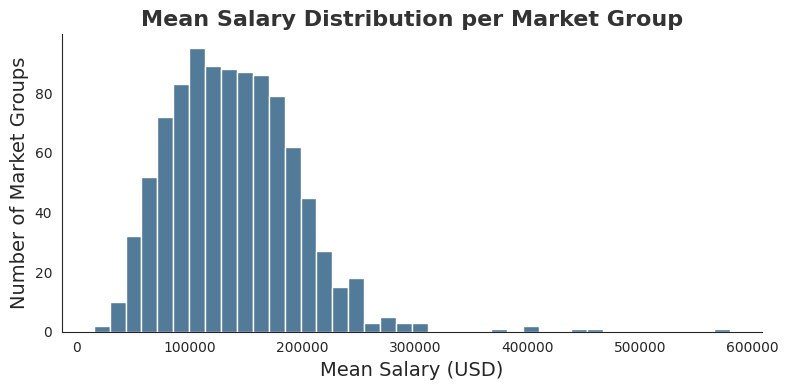

In [ ]:
stable_groups = grouped[grouped['count'] >= 3]
print(f'Stable groups (n >= 3): {stable_groups.shape[0]}')

plt.figure(figsize=(8,4))

# Set style and color
sns.set_style("white")
sns.histplot(
    data=grouped,
    x='mean',
    bins=40,
    color='#184e77',
    kde=False
)

plt.title('Mean Salary Distribution per Market Group', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Mean Salary (USD)', fontsize=14)
plt.ylabel('Number of Market Groups', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

## Salary by Experience Level

                  count           mean    median      min       max
experience_level                                                   
EX                   40  179192.850000  180750.0  57162.0  272500.0
SE                  265  151740.805660  153650.0  46389.0  356250.0
MI                  224  122492.890625  120050.0  36000.0  368750.0
EN                   92   96393.820652   88934.5  39612.5  184300.0


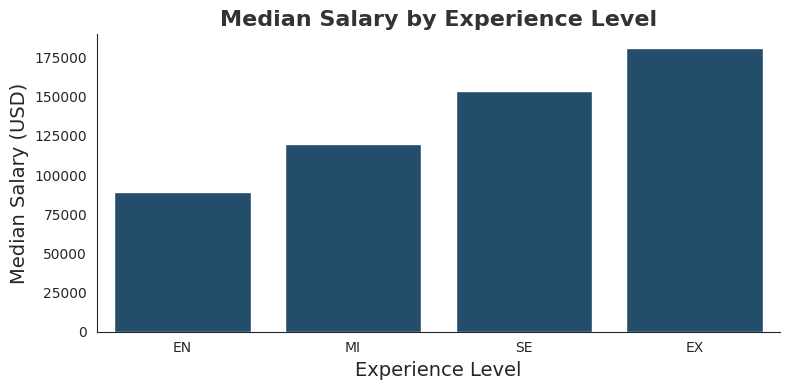

In [ ]:
exp_summary = (
    stable_groups.groupby('experience_level')['median']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('median', ascending=False)
)
print(exp_summary)

# Plot
plt.figure(figsize=(8,4))

sns.set_style("white")

sns.barplot(
    data=exp_summary.reset_index(),
    x='experience_level', y='median',
    order=['EN', 'MI', 'SE', 'EX'],
    color='#184e77'
)

plt.title('Median Salary by Experience Level', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Median Salary (USD)', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()


**Insight:** Executive roles command the highest salaries, followed by Senior, Mid, Entry.


## Top Job Titles by Frequency (Stable Groups)

                       job_title  count
0                  Data Engineer     29
1                 Data Scientist     28
2                   Data Analyst     27
3      Machine Learning Engineer     22
4              Applied Scientist     13
5             Research Scientist     13
6             Analytics Engineer     12
7                       Engineer     12
8                   Data Manager     11
9  Business Intelligence Analyst     11


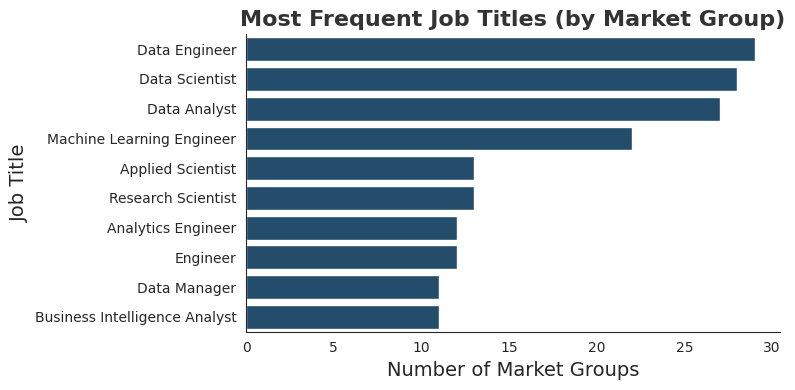

In [ ]:
top_job_freq = (
    stable_groups['job_title'].value_counts()
    .head(10)
    .reset_index()
)
top_job_freq.columns = ['job_title', 'count']
print(top_job_freq)

plt.figure(figsize=(8,4))
sns.set_style("white")

sns.barplot(
    data=top_job_freq,
    y='job_title',
    x='count',
    color='#184e77'
)

plt.title('Most Frequent Job Titles (by Market Group)', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Number of Market Groups', fontsize=14)
plt.ylabel('Job Title', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()


> **Insight:** Data Engineer, Data Scientist, Data Analyst, and ML Engineer are the most common job titles in this market.

## Top Job Titles by Median Salary (At Least 3 Stable Groups)

                        job_title     median  group_count
106                  head of data  232000.00            3
5              ai product manager  215300.00            3
155           solutions architect  192600.00            3
38       computer vision engineer  192500.00            5
54   data infrastructure engineer  192500.00            3
2                    ai developer  185000.00            3
144             research engineer  182400.00            9
149     site reliability engineer  180800.00            3
16              applied scientist  180000.00           13
156            solutions engineer  177831.25            4


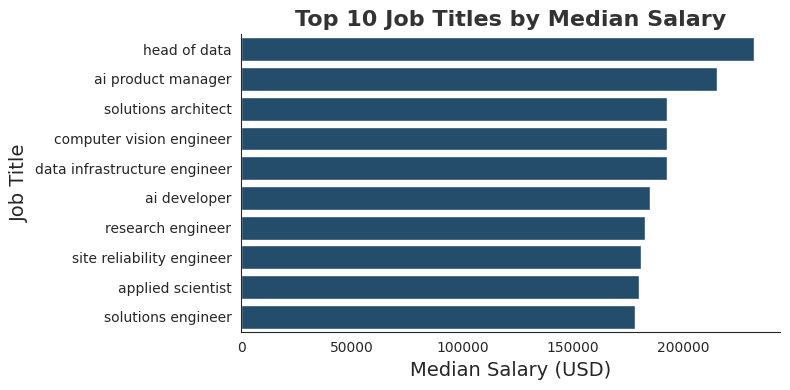

In [ ]:
stable_groups = stable_groups.copy()
stable_groups['job_title'] = stable_groups['job_title'].str.strip().str.lower()

job_title_salary = (
    stable_groups.groupby('job_title')['median']
    .median()
    .reset_index()
)

counts = stable_groups.groupby('job_title').size().reset_index(name='group_count')
job_title_salary = job_title_salary.merge(counts, on='job_title')
job_title_salary = job_title_salary[job_title_salary['group_count'] >= 3]

job_title_salary = job_title_salary.sort_values('median', ascending=False)
print(job_title_salary.head(10))

top10 = job_title_salary.head(10)
plt.figure(figsize=(8,4))
sns.set_style("white")

sns.barplot(
    data=top10,
    y='job_title', x='median',
    color='#184e77'
)

plt.title('Top 10 Job Titles by Median Salary', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Median Salary (USD)', fontsize=14)
plt.ylabel('Job Title', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

> **Insight:** Executive and niche technical roles (Head of Data, AI Product Manager, Solutions Architect) dominate the top salary bands.

## Salary by Company Size (Stable Groups Only)

              count           mean    median      min       max
company_size                                                   
L                48  158310.385417  164025.0  87150.0  236100.0
M               573  132786.680628  130000.0  36000.0  368750.0


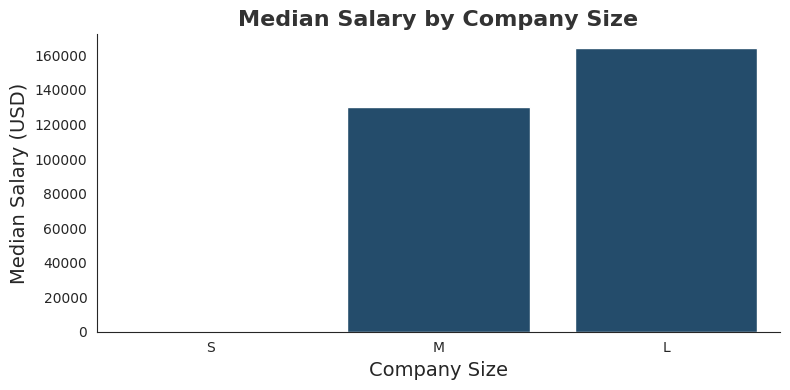

In [ ]:
size_summary = (
    stable_groups.groupby('company_size')['median']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('median', ascending=False)
)
print(size_summary)

plt.figure(figsize=(8,4))

sns.set_style("white")

sns.barplot(
    data=size_summary.reset_index(),
    x='company_size', y='median',
    order=['S', 'M', 'L'],
    color='#184e77'
)

plt.title('Median Salary by Company Size', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Median Salary (USD)', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()


> **Insight:** Medium-sized companies dominate this market. Median salaries by company size should be interpreted with caution due to the data skew.

## Salary by Country (Stable Groups Only)

                  count           mean     median      min       max
company_location                                                    
US                  462  145218.234848  140195.50  36000.0  307710.0
CA                   76  117378.401316  110555.75  60839.0  215300.0
GB                   83   92458.837349   75200.50  39612.5  368750.0


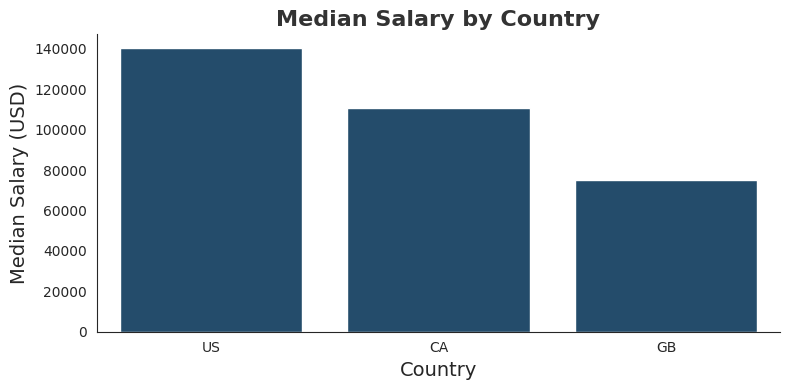

In [ ]:
country_summary = (
    stable_groups.groupby('company_location')['median']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('median', ascending=False)
)
print(country_summary)

plt.figure(figsize=(8,4))
sns.set_style("white")

sns.barplot(
    data=country_summary.reset_index(),
    x='company_location', y='median',
    color='#184e77'
)

plt.title('Median Salary by Country', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Median Salary (USD)', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

> **Insight:** The US leads median salaries, followed by Canada and the UK (sample size caveats apply).

## Key Strategic Insights
- Seniority and specialization drive higher compensation
- Data Engineer and Data Scientist roles are most abundant; executive/specialized roles have the highest salaries
- Medium-sized companies dominate this market segment
- US jobs have the highest median salaries, but all three countries show broad ranges
- Always check group count for statistical reliability


## Recommendations
- **For jobseekers:** Target executive and specialist roles for top compensation; use these benchmarks in negotiations
- **For employers:** Benchmark salaries to US market for international talent; invest in senior/executive retention
- **For analysts:** Use "stable group" medians for planning/budgeting; avoid single-response outliers


## Appendix
- **Code & data fully reproducible**
- **Data:** salaries.csv (AIJobs.net, 2020–2024)
- **Tools:** Python (pandas, matplotlib, seaborn)


### Export for Dashboard Use

In [ ]:
# --- Export cleaned, stable (aggregated) dataset for dashboard use ---
stable_groups.to_csv('salary_groups.csv', index=False)
print("Exported 'salary_groups.csv' for dashboard use.")

# Optional: also export the fully filtered (row-level, not aggregated) dataset
df.to_csv('salary_filtered.csv', index=False)
print("Exported 'salary_filtered.csv' for dashboard use.")

# Also export Top Job Titles by Median Salary for dashboard use
job_title_salary.to_csv('job_title_salary.csv', index=False)
print("Exported 'job_title_salary.csv' for dashboard use (Top N job titles).")

Exported 'salary_groups.csv' for dashboard use.
Exported 'salary_filtered.csv' for dashboard use.
Exported 'job_title_salary.csv' for dashboard use (Top N job titles).



---

*Prepared for data-driven hiring, compensation benchmarking, and analytics leadership. Project by André Jardim, 2024.*